In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('data/zoo.csv')

In [3]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df['bird'] = np.where(df['class_type'] == 2, 1, 0)

In [5]:
df = df.drop('class_type', axis=1)
df = df.drop('animal_name', axis=1)

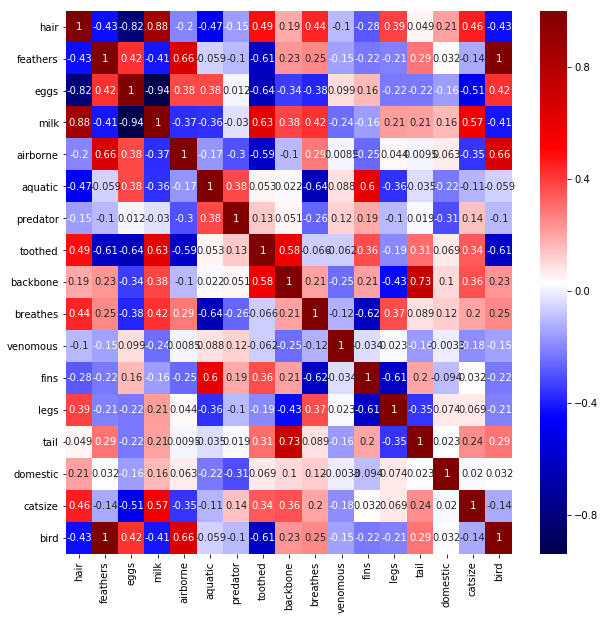

In [6]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='seismic')

In [7]:
target = 'bird'
y = df[target]
X = df.drop(target, axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [9]:
model = LogisticRegression(solver='lbfgs')

In [10]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
yhat = model.predict(X_test)

In [12]:
pd.DataFrame({
    'y_true': y_test, 
    'y_hat': yhat
})

,y_hat,y_true
81,0,0
17,0,0
46,0,0
23,1,1
57,1,1
78,1,1
37,1,1
1,0,0
18,0,0
45,0,0


In [13]:
model.coef_[0]

array([-0.62958136,  2.0161598 ,  0.55278384, -0.55644236,  0.9085616 ,
       -0.26245193, -0.07646795, -1.39628278,  0.35348505,  0.72443694,
       -0.30824594, -0.59536121, -0.38192669,  0.47323664,  0.02175649,
        0.13084283])

In [14]:
list(zip(X_train.columns, np.exp(model.coef_[0])))

[('hair', 0.5328148120048897),
 ('feathers', 7.509431754691922),
 ('eggs', 1.73808483892085),
 ('milk', 0.5732448415910154),
 ('airborne', 2.4807516559150495),
 ('aquatic', 0.7691633365074261),
 ('predator', 0.9263826020700595),
 ('toothed', 0.2475153239356906),
 ('backbone', 1.424021701126058),
 ('breathes', 2.0635688575113664),
 ('venomous', 0.734734593805509),
 ('fins', 0.5513633745794854),
 ('legs', 0.6825450906126932),
 ('tail', 1.6051811826360722),
 ('domestic', 1.0219948833897512),
 ('catsize', 1.1397886223892202)]

In [15]:
X_train.sample(1).to_dict(orient='list')

{'airborne': [0],
 'aquatic': [0],
 'backbone': [1],
 'breathes': [1],
 'catsize': [1],
 'domestic': [1],
 'eggs': [0],
 'feathers': [0],
 'fins': [0],
 'hair': [1],
 'legs': [4],
 'milk': [1],
 'predator': [0],
 'tail': [1],
 'toothed': [1],
 'venomous': [0]}

In [16]:
# zebra

new = pd.DataFrame({
    'hair': [1],
    'feathers': [0],
    'eggs': [0],
    'milk': [1],
    'airborne': [0],
    'aquatic': [0],
    'predator': [0],
    'toothed': [1],
    'backbone': [1],
    'breathes': [1],
    'venomous': [0],
    'fins': [0],
    'legs': [4],
    'tail': [1],
    'domestic': [0],
    'catsize': [0]
})

model.predict_proba(new)[:, 1]

array([0.06681112])